<a href="https://colab.research.google.com/github/DanielMSousa/curso-deeplearning-na-pratica/blob/main/Projeto_7_Classifica%C3%A7%C3%A3o_de_sinais_de_tr%C3%A2nsito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto 7: Classificação de sinais de trânsito

Arquitetura LeNet: http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf

# Etapa 1: Importação das bibliotecas

In [ ]:
%tensorflow_version 2.x
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import zipfile
tf.__version__

'2.7.0'

# Etapa 2: Importação da base de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
path = '/content/drive/MyDrive/Datasets/traffic-signs-data.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
with open('/content/traffic-signs-data/train.p', mode='rb') as training_data:
  train = pickle.load(training_data)
with open('/content/traffic-signs-data/test.p', mode='rb') as testing_data:
  test = pickle.load(testing_data)
with open('/content/traffic-signs-data/valid.p', mode='rb') as validation_data:
  valid = pickle.load(validation_data)

In [ ]:
train

{'coords': array([[  6,   5,  21,  20],
        [  6,   6,  22,  22],
        [  5,   6,  22,  23],
        ...,
        [ 17,  15, 178, 155],
        [ 17,  15, 183, 160],
        [ 20,  18, 211, 184]], dtype=uint8),
 'features': array([[[[ 28,  25,  24],
          [ 27,  24,  23],
          [ 27,  24,  22],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  25],
          [ 31,  27,  26]],
 
         [[ 29,  26,  25],
          [ 27,  25,  23],
          [ 27,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         [[ 28,  26,  26],
          [ 27,  25,  23],
          [ 26,  25,  23],
          ...,
          [ 32,  28,  24],
          [ 31,  27,  24],
          [ 30,  27,  25]],
 
         ...,
 
         [[ 27,  24,  23],
          [ 28,  25,  24],
          [ 30,  25,  24],
          ...,
          [ 27,  24,  23],
          [ 28,  24,  22],
          [ 29,  25,  22]],
 
         [[ 28,  23,  23],
       

In [ ]:
X_train, y_train = train['features'], train['labels']

X_test, y_test = test['features'], test['labels']

X_validation, y_validation = valid['features'], valid['labels']

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

# Etapa 3: Visualização dos dados

1

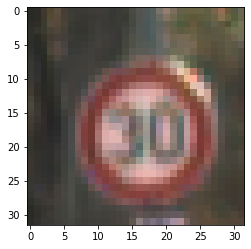

In [ ]:
i = 3100
plt.imshow(X_train[i])
y_train[i]

36

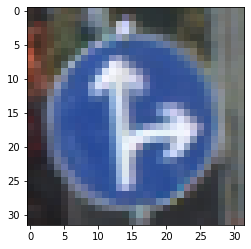

In [ ]:
i = 3001
plt.imshow(X_test[i])
y_test[i]

8

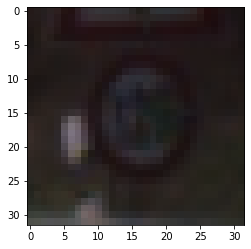

In [ ]:
i = 2100
plt.imshow(X_validation[i])
y_validation[i]

# Etapa 4: Preparação dos dados

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
#Transformando em escala de cinza
X_train_gray = np.sum(X_train / 3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test / 3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation / 3, axis=3, keepdims=True)

In [ ]:
X_train_gray.shape

(34799, 32, 32, 1)

In [ ]:
X_train_gray_norm = (X_train_gray - 128) / 128
X_test_gray_norm = (X_test_gray - 128) / 128
X_validation_gray_norm = (X_validation_gray - 128) / 128

In [ ]:
np.max(X_train_gray_norm)

0.9921875

In [ ]:
np.min(X_train_gray_norm)

-0.9713541666666666

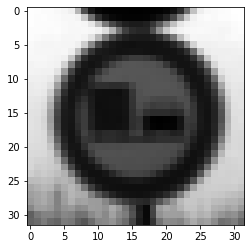

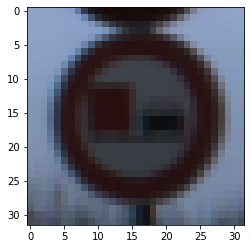

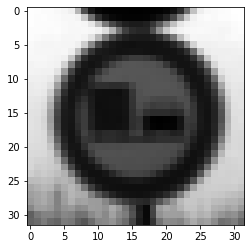

In [ ]:
i = 60
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap='gray')

# Etapa 5: Criação do modelo e treinamento

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [ ]:
from tensorflow.keras import layers, models

Lenet = models.Sequential()

Lenet.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32, 32, 1)))
Lenet.add(layers.AveragePooling2D())

Lenet.add(layers.Conv2D(16, (5, 5), activation='relu'))
Lenet.add(layers.AveragePooling2D())

Lenet.add(layers.Flatten())

Lenet.add(layers.Dense(units=120, activation='relu'))
Lenet.add(layers.Dense(units=84, activation='relu'))
Lenet.add(layers.Dense(units=43, activation='softmax'))

Lenet.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [ ]:
Lenet.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = Lenet.fit(X_train_gray_norm, y_train, batch_size=500, epochs=50, validation_data= [X_validation_gray_norm, y_validation])

Epoch 1/50
70/70 [==============================] - 1s 9ms/step - loss: 3.1889 - accuracy: 0.1745 - val_loss: 2.6751 - val_accuracy: 0.2950
Epoch 2/50
70/70 [==============================] - 0s 7ms/step - loss: 1.6495 - accuracy: 0.5505 - val_loss: 1.3635 - val_accuracy: 0.5921
Epoch 3/50
70/70 [==============================] - 0s 6ms/step - loss: 0.9027 - accuracy: 0.7532 - val_loss: 0.9987 - val_accuracy: 0.7025
Epoch 4/50
70/70 [==============================] - 0s 7ms/step - loss: 0.6460 - accuracy: 0.8253 - val_loss: 0.8416 - val_accuracy: 0.7531
Epoch 5/50
70/70 [==============================] - 0s 6ms/step - loss: 0.5081 - accuracy: 0.8639 - val_loss: 0.7515 - val_accuracy: 0.8023
Epoch 6/50
70/70 [==============================] - 0s 6ms/step - loss: 0.4260 - accuracy: 0.8863 - val_loss: 0.6692 - val_accuracy: 0.8143
Epoch 7/50
70/70 [==============================] - 0s 6ms/step - loss: 0.3601 - accuracy: 0.9057 - val_loss: 0.6710 - val_accuracy: 0.8179
Epoch 8/50
70/70 [==

# Etapa 6: Avaliação do modelo

In [ ]:
score = Lenet.evaluate(X_test_gray_norm, y_test)
print(f'test accuracy: {score[1]}')

395/395 [==============================] - 1s 2ms/step - loss: 1.0579 - accuracy: 0.8884
test accuracy: 0.8884402513504028


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

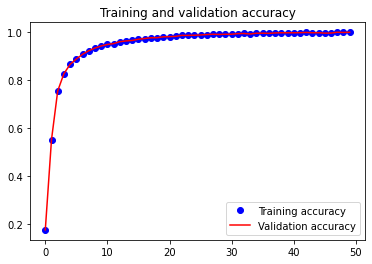

In [ ]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, accuracy, 'b', color='r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend();

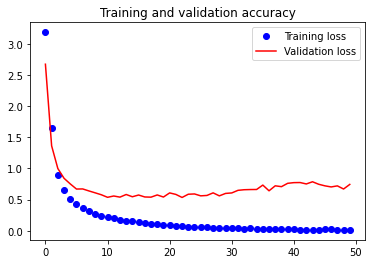

In [ ]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', color='r', label='Validation loss')
plt.title('Training and validation accuracy')
plt.legend();

In [ ]:
predicted_classes = Lenet.predict(X_test_gray_norm)
predicted_classes = np.argmax(predicted_classes, axis=1) 

In [ ]:
predicted_classes

array([16,  1, 38, ...,  8,  7, 10])

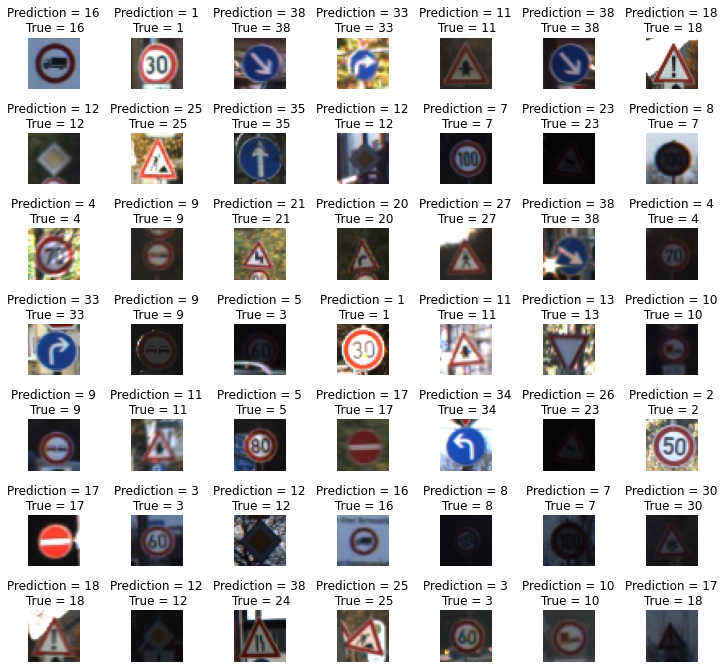

In [ ]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    